# Synapses

- Synaptic filter
- PSC after 1 spike
- PSC after many spikes
- PSC during constant firing

In [1]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
#import jonef
import ipywidgets as widgets
%matplotlib notebook
#%matplotlib inline

## Selected code from `jonef.py`

In [15]:
import math
def Spikes2PSC(t, spike_times, tau_s, n=0):
    ''' psc = Spikes2PSC(t, spike_times, tau_s, n=0) '''
    psc = np.array(np.zeros(t.shape))
    for spike in spike_times:
        psc = psc + PSCFilter(t, tau_s, spike, n)
    return psc

def PSCFilter(t, tau_s, t0=0, n=1):
    ''' psc_filter = PSCFilter(t, tau_s, t0=0, n=1)
        t is an array of times,
        tau_s is the synaptic time constant (eg. 0.01 s),
        t0 is the time for the spike,
        n is the power of the curve (see notes).
    '''
    t2 = t-t0
    xc = t2**n * np.exp(-t2/tau_s)
    xc[t2<0] = 0
    # Normalize the filter so that its integral is 1
    #pdb.set_trace() # this sets a breakpoint
    integral = math.factorial(n)*tau_s**(n+1)
    xc = xc / integral
    return xc

def PlotSpikeRaster(st, y_range=[0, 1.]):
    '''
    PlotSpikeRaster(spiketimes, y_range=[0, 1.])

    Plots a spike raster plot for a list of arrays of spike times.

    Input:
      spiketimes is a list of arrays of spike times, like that returned
          by the function Stim2Spikes.
      y_range is a 2-tuple that holds the y-values that the raster ticks
          should be drawn between
    '''
    N = len(st)  # number of neurons

    levels = np.linspace(y_range[0], y_range[1], N+1, endpoint=True)
    for n in range(N):
        nspikes = len(st[n])
        y = [ [levels[n]]*nspikes , [levels[n+1]]*nspikes ]
        #y = y_range[0] + [levels[n]]*nspikes
        plt.plot(np.vstack((st[n],st[n])), y, color=np.random.rand(3))
    plt.ylim(y_range)
    return


## Synaptic Filter

In [16]:
def SynapticFilter(t, offset=0., tau_s=0.05, n=0):
    if t<offset:
        return 0.
    else:
        return (t-offset)**n*np.exp(-(t-offset)/tau_s)

<IPython.core.display.Javascript object>


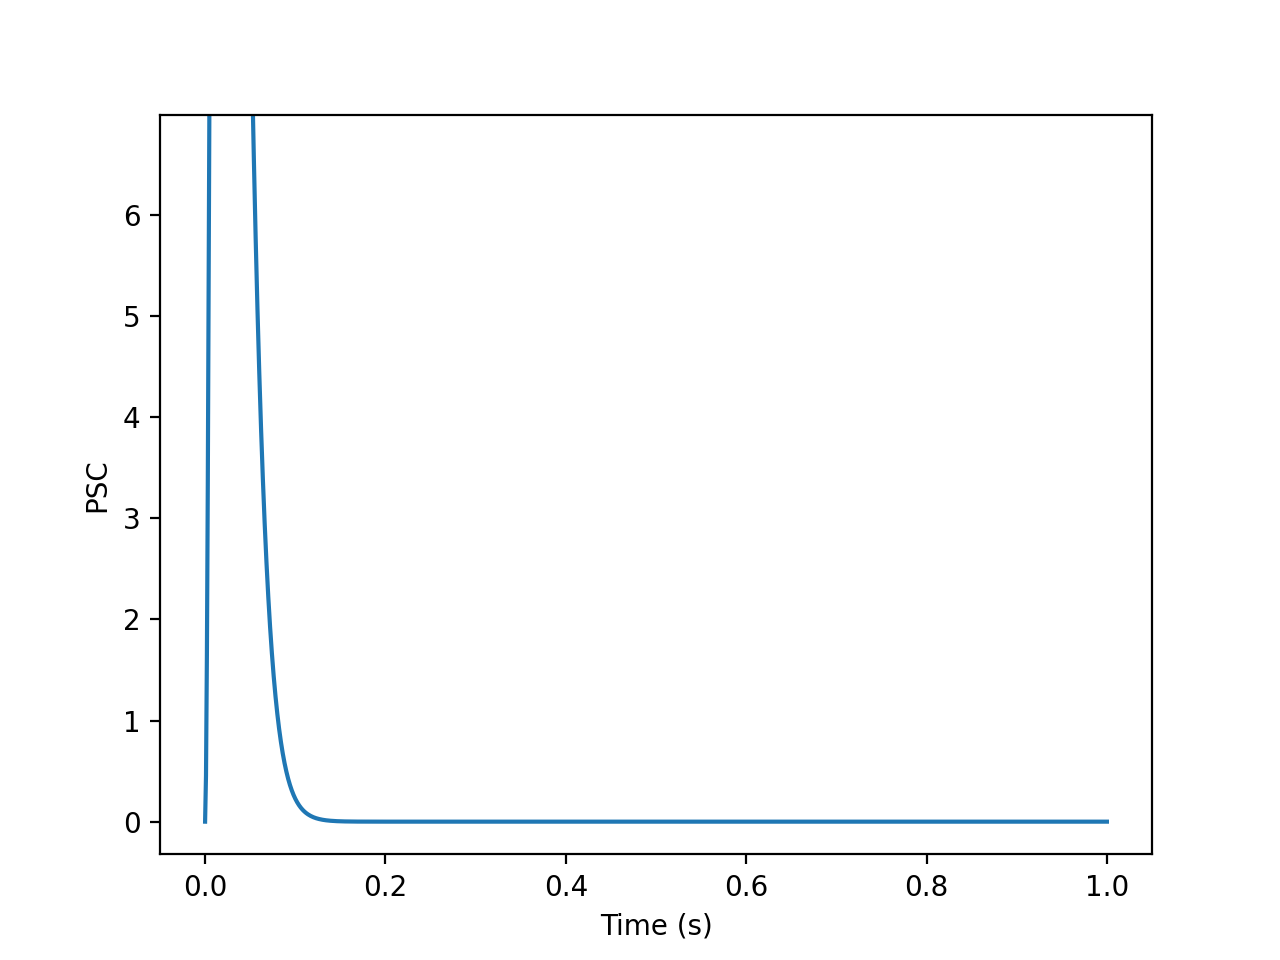

interactive(children=(FloatSlider(value=0.01, description='tau_s', max=0.5, min=0.001, readout_format='.3f', s…

In [17]:
# Try tau_s values of 0.005, 0.03, 0.1
tau_s = 0.150
t = np.linspace(0, 1, 1000)
dt = t[1]-t[0]
s = np.array([SynapticFilter(tt, tau_s=tau_s, offset=0.0, n=0) for tt in t])
s = s / sum(s) / dt
fig = plt.figure(1); ax = fig.add_subplot(1,1,1)
line, = ax.plot(t,s); ax.set_xlabel('Time (s)'); ax.set_ylabel('PSC');

def update(tau_s=0.015):
    s = np.array([SynapticFilter(tt, tau_s=tau_s, offset=0.0, n=2) for tt in t])
    s = s / sum(s) / dt
    line.set_ydata(s)
    fig.canvas.draw_idle()

blah = widgets.interact(update, tau_s=widgets.FloatSlider(value=0.01, min=0.001, max=0.5, step=0.001, readout_format='.3f'))

## One Spike

In [18]:
def DemoSpikeTrain(P, T):
    if P==1:
        A = np.random.rand(1)*T/2
    elif P<50:
        A = np.random.rand(P)*T
    else:
        A = np.linspace(0.0, T, P)
    return A

In [19]:
T = 1
dt = 0.001
t2 = np.arange(0.0, T, dt)

<IPython.core.display.Javascript object>


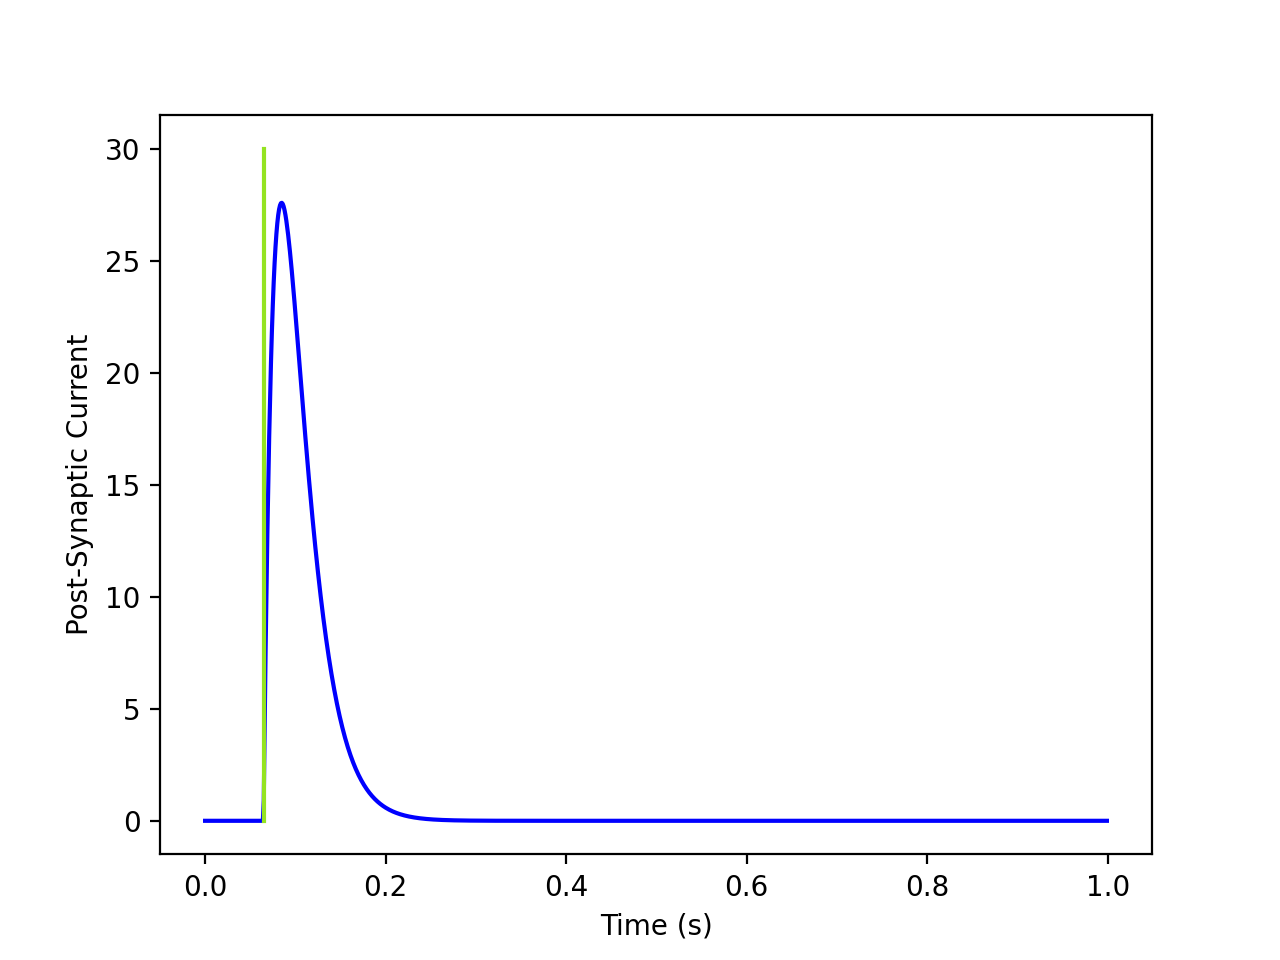

In [20]:
P = 1   # Number of spikes, try 1 to 50, or over 50
A = DemoSpikeTrain(P, T)
p2 = Spikes2PSC(t2, A, 0.02, 1)
#%matplotlib inline
plt.figure()
plt.plot(t2,1.5*p2,'b'), plt.xlabel('Time (s)'), plt.ylabel('Post-Synaptic Current')
PlotSpikeRaster([A], y_range=[0, 30]), plt.axis('auto');

In [21]:
A

array([0.06475325])

<IPython.core.display.Javascript object>


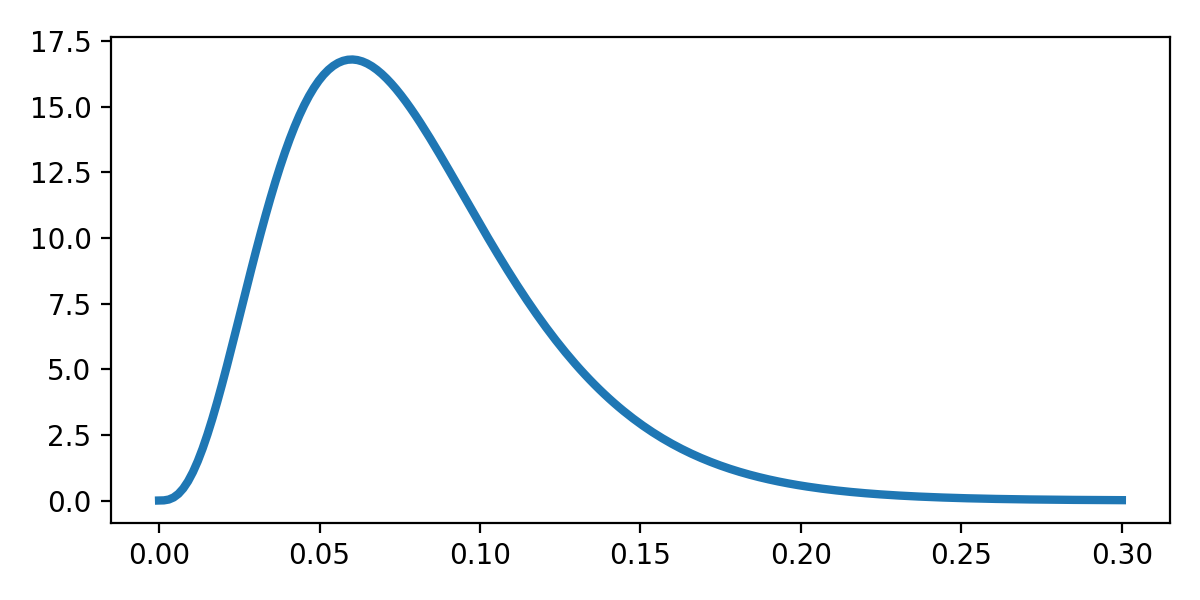

In [23]:
t3 = np.linspace(0, 0.3, 200)
p3 = Spikes2PSC(t3, [[0]], 0.02, 3)
plt.figure(figsize=(6,3))
plt.plot(t3, 1.5*p3, linewidth=3);
plt.tight_layout()
plt.savefig('psc.pdf')

## Many Spikes

<IPython.core.display.Javascript object>


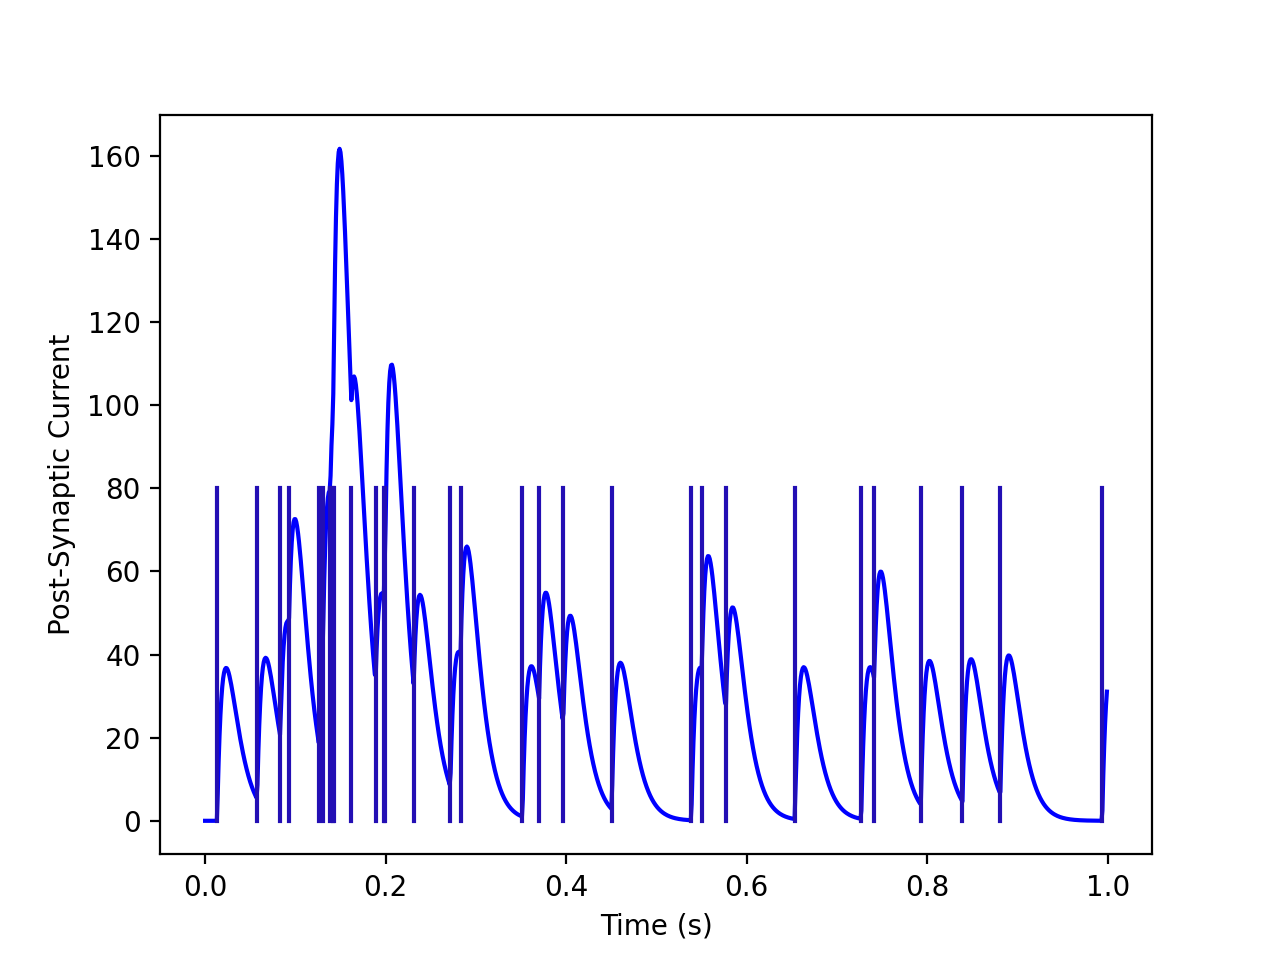

In [24]:
P=30   # Number of spikes, try 1 to 50, or over 50
A = DemoSpikeTrain(P, T)
p2 = Spikes2PSC(t2, A, 0.01, 1) # try changing tau_s (0.01, or 0.1)
plt.figure()
plt.plot(t2,p2,'b'), plt.xlabel('Time (s)'), plt.ylabel('Post-Synaptic Current')
PlotSpikeRaster([A], y_range=[0, 80]), plt.axis('auto');

<IPython.core.display.Javascript object>


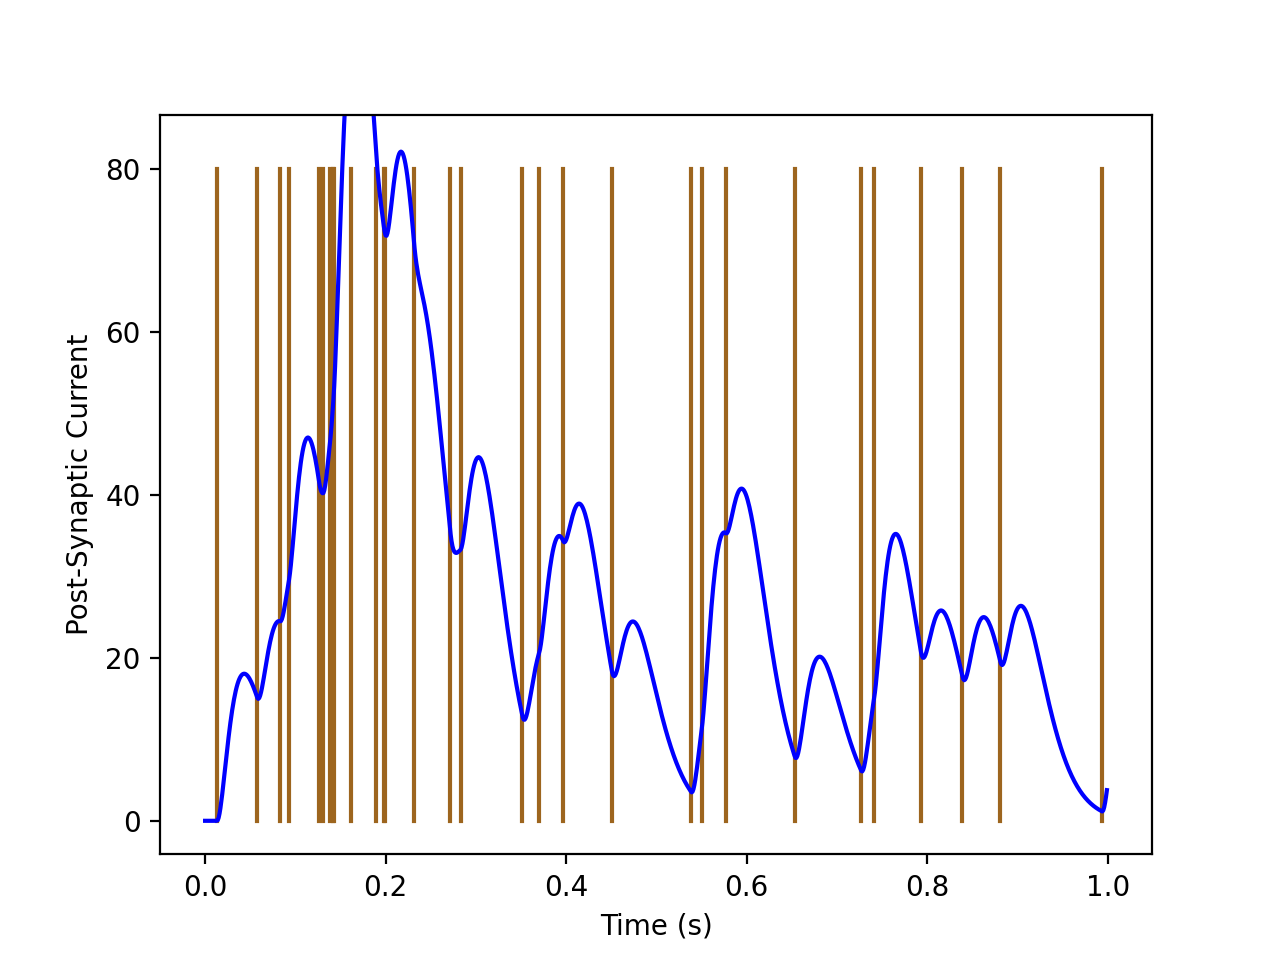

interactive(children=(FloatSlider(value=0.05, description='tau_s', max=0.2, min=0.001, step=0.001), Output()),…

In [25]:
p2 = Spikes2PSC(t2, A, 0.03, 1) # try changing tau_s (0.01, or 0.1)
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

PlotSpikeRaster([A], y_range=[0, 80]), ax.axis('auto');
line, = ax.plot(t2,p2,'b'); ax.set_xlabel('Time (s)'); ax.set_ylabel('Post-Synaptic Current')

def update(tau_s=0.1):
    p2 = Spikes2PSC(t2, A, tau_s, 2)
    line.set_ydata(p2)
    fig.canvas.draw_idle()
    
widgets.interact(update, tau_s=widgets.FloatSlider(value=0.05, min=0.001, max=0.2, step=0.001));

## Constant Firing

<IPython.core.display.Javascript object>


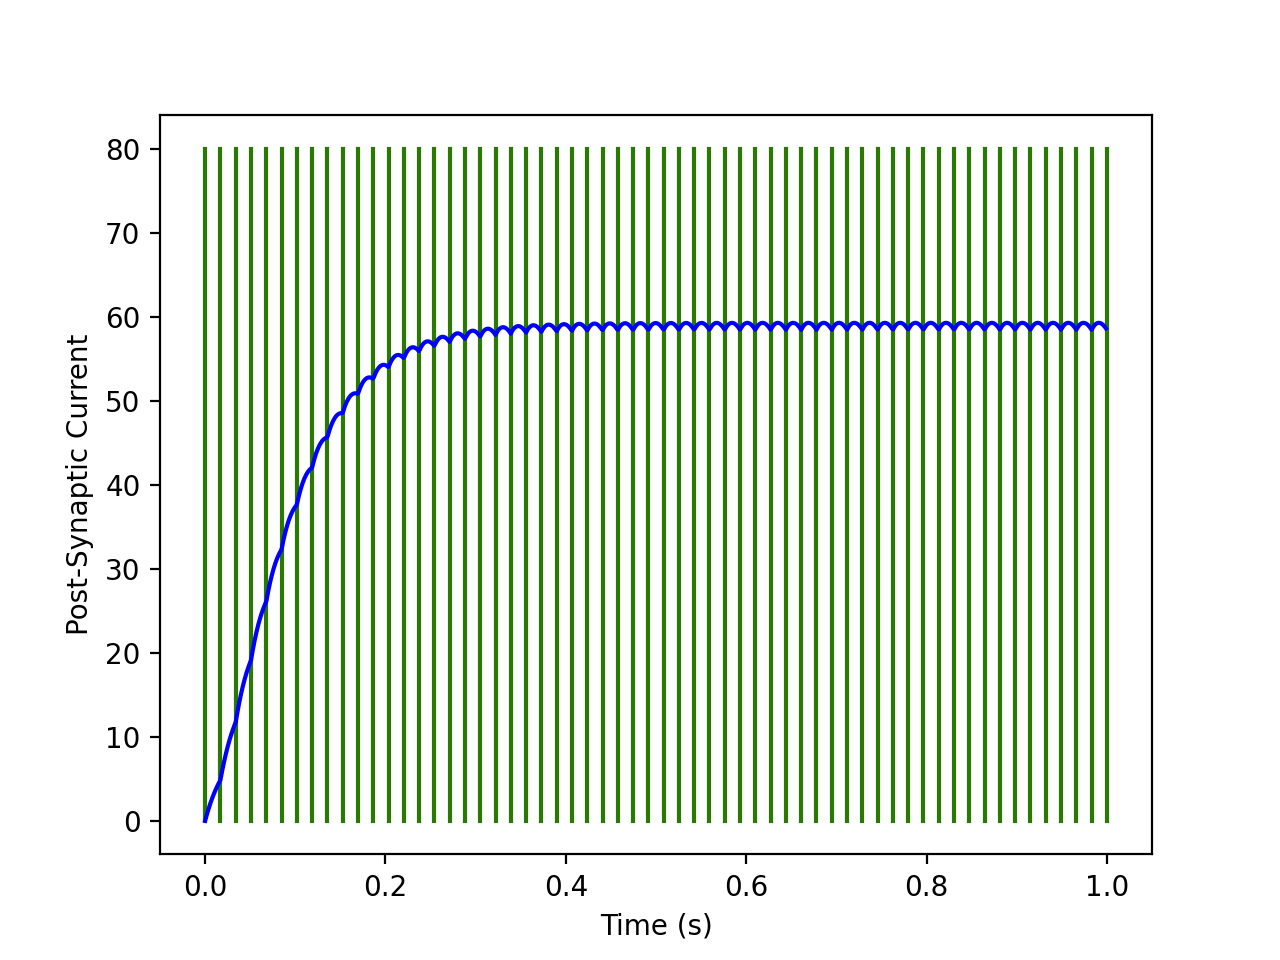

Text(0, 0.5, 'Post-Synaptic Current')

In [26]:
P=60   # Number of spikes, try 1 to 50, or over 50
A = DemoSpikeTrain(P, T)
p2 = Spikes2PSC(t2, A, 0.05, 1)
%matplotlib notebook
plt.figure()
PlotSpikeRaster([A], y_range=[0, 80]); plt.axis('auto');
plt.plot(t2,p2,'b'); plt.xlabel('Time (s)'); plt.ylabel('Post-Synaptic Current')

## Combining spikes from multiple neurons

In [27]:
T = 2
dt = 0.001
t2 = np.arange(0.0, T, dt)

A = DemoSpikeTrain(9, T)
B = DemoSpikeTrain(12, T)

In [28]:
w_CA = 0.4
w_CB = -0.25

In [29]:
p_CA = Spikes2PSC(t2, A, tau_s=0.03, n=1)
p_CB = Spikes2PSC(t2, B, tau_s=0.03, n=1)

<IPython.core.display.Javascript object>


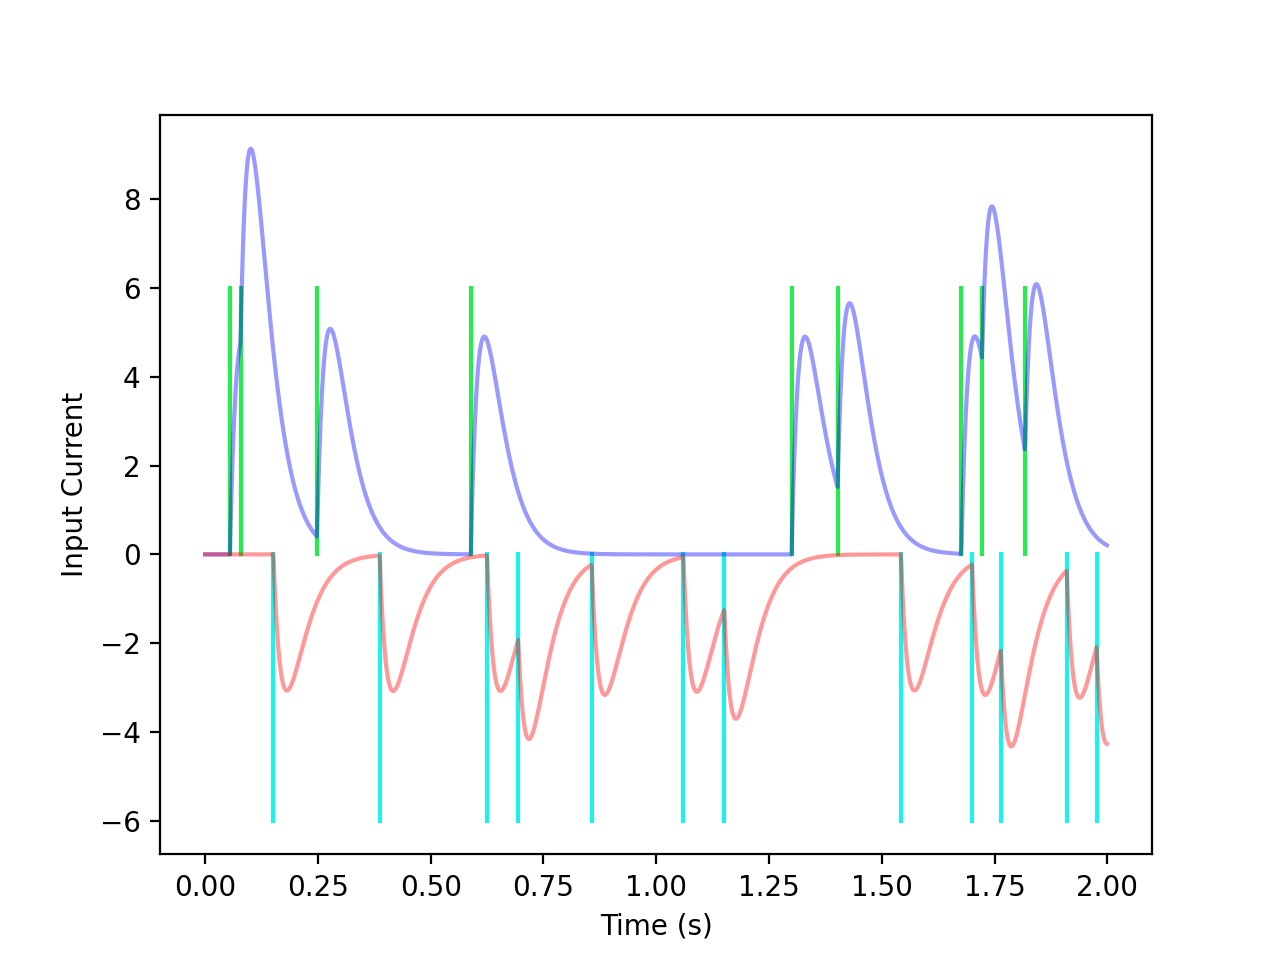

In [30]:
%matplotlib notebook
plt.figure(7)
PlotSpikeRaster([A], y_range=[0,6])
PlotSpikeRaster([B], y_range=[-6,0])
plt.plot(t2, w_CA*p_CA, 'b', alpha=0.4)
plt.plot(t2, w_CB*p_CB, 'r', alpha=0.4)
plt.xlabel('Time (s)'); plt.ylabel('Input Current');
plt.axis('auto');

<IPython.core.display.Javascript object>


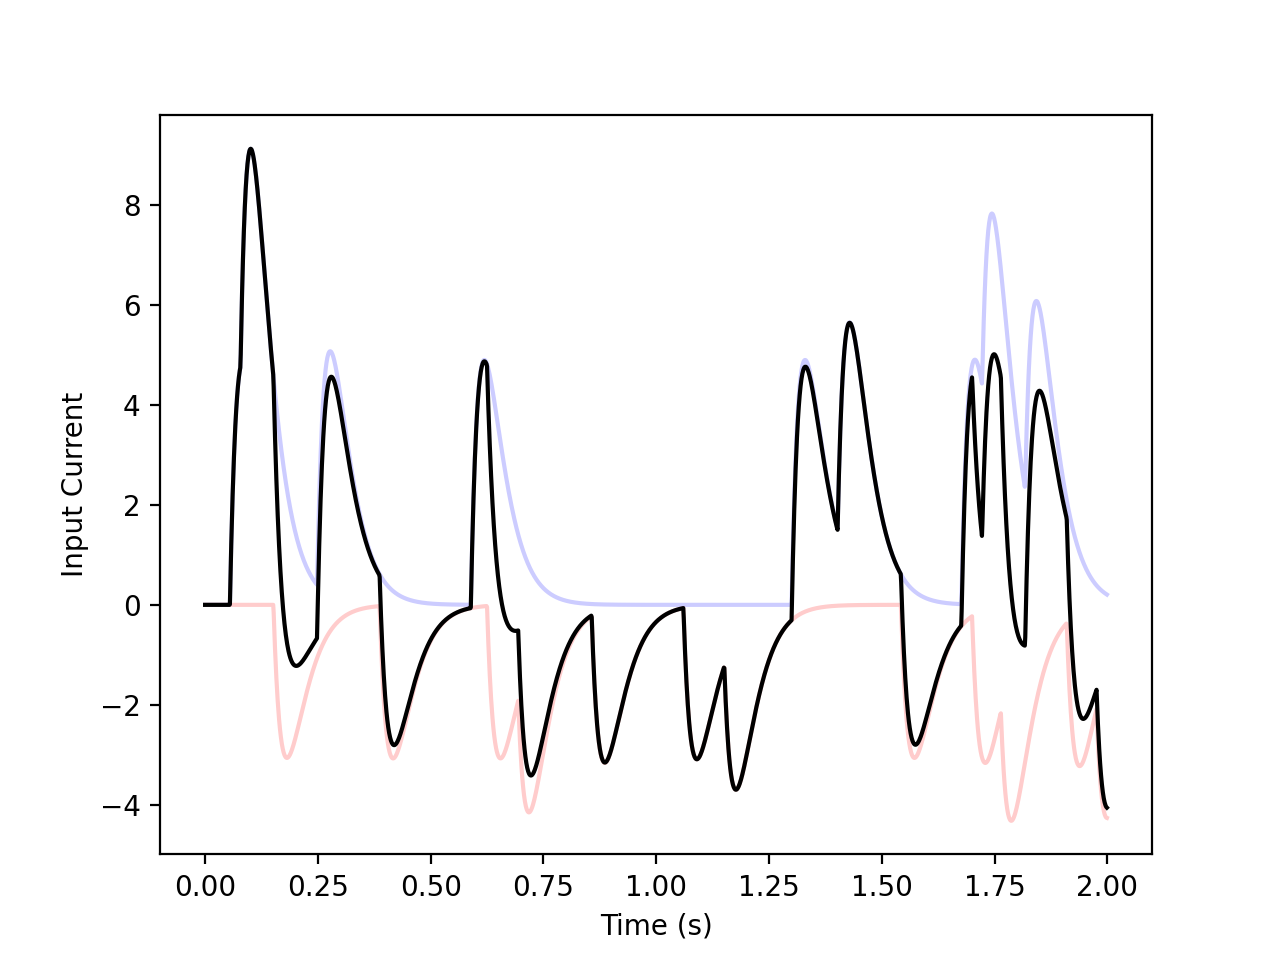

In [31]:
plt.figure(8)
plt.plot(t2, w_CA*p_CA, 'b', alpha=0.2)
plt.plot(t2, w_CB*p_CB, 'r', alpha=0.2)
plt.plot(t2, w_CA*p_CA + w_CB*p_CB, 'k')
plt.xlabel('Time (s)'); plt.ylabel('Input Current');

<IPython.core.display.Javascript object>


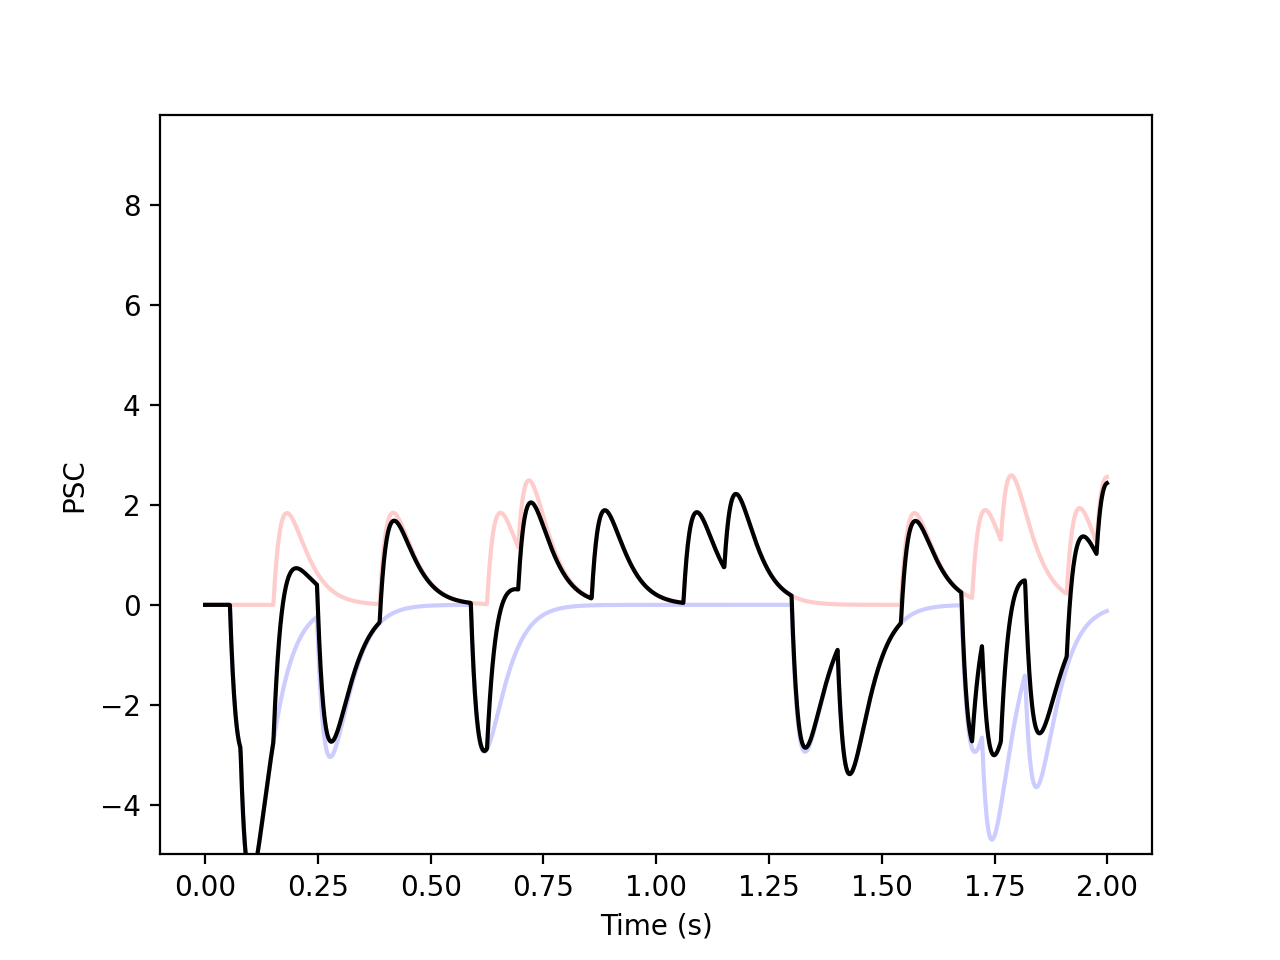

interactive(children=(FloatSlider(value=0.4, description='w_CA', max=0.5, min=-0.5, readout_format='.3f', step…

In [32]:
fig = plt.figure(9); ax = fig.add_subplot(1,1,1)
lineCA, = ax.plot(t2, w_CA*p_CA, 'b', alpha=0.2);
lineCB, = ax.plot(t2, w_CB*p_CB, 'r', alpha=0.2);
lineBoth, = ax.plot(t2, w_CA*p_CA + w_CB*p_CB, 'k');
ax.set_xlabel('Time (s)'); ax.set_ylabel('PSC');

def update(w_CA=0.4, w_CB=0.25):
    lineCA.set_ydata(w_CA*p_CA)
    lineCB.set_ydata(w_CB*p_CB)
    lineBoth.set_ydata(w_CA*p_CA + w_CB*p_CB)
    fig.canvas.draw_idle()

blah = widgets.interact(update, w_CA=widgets.FloatSlider(value=0.4, min=-0.5, max=0.5, step=0.01, readout_format='.3f'),
                       w_CB=widgets.FloatSlider(value=-0.25, min=-0.5, max=0.5, step=0.01, readout_format='.3f'))